Imports

In [1]:
from filter_datasets import *
import json
import collections
import seaborn as sn
import matplotlib.pyplot as plt
import ppx #A Python interface to proteomics data repositories
from pyteomics import mztab
from ete3 import Tree, NodeStyle, TreeStyle, NodeStyle, faces, AttrFace, CircleFace
from ete3 import NCBITaxa

## Search databases in PRIDE:

- Pride_plant.json is the result from filterPride function on PRIDE databases


In [2]:
with open('pride_plant.json') as pride_plants_file:
    pride_plant = json.load(pride_plants_file)
print(f"Total of plants projects retrieved from PRIDE database: {len(pride_plant)}")

Total of plants projects retrieved from PRIDE database: 1464


- Pride_plantas_mztab.json is the result from get_mztabs on PRIDE plants projects

In [3]:
with open("pride_plants_mztab.json") as mztabs:
    pride_plants_mztab = json.load(mztabs)
print(f"Total of projects with mztab files from PRIDE: {len(pride_plants_mztab)}")

Total of projects with mztab files from PRIDE: 270


Quantos projetos contem arquivos mztab para cada especie?

In [19]:
pride_plants_names = [values["name"] for keys,values in pride_plant.items()]
pride_plants_counter = collections.Counter(pride_plants_names)
plant_names = [plants[0] for plants in pride_plants_counter.items()]
plant_quant = [plants[1] for plants in pride_plants_counter.items()]
plant_with_mztab = [] 
for specie in pride_plants_counter.keys():
    all_projects = [projects for projects,values in pride_plant.items() if f"{specie}" == values["name"]]
    mztab_projects = list(set(pride_plants_mztab.keys()) & set(all_projects))
    plant_with_mztab.append(len(mztab_projects))
    # print(specie,len(all_projects),len(mztab_projects))

plants_count_dataframe = pd.DataFrame({
    "Specie":plant_names,
    "Total_projects":plant_quant,
    "Projects_with_mztab":plant_with_mztab
})
plants_count_dataframe.sort_values("Total_projects", ascending = False, inplace = True)


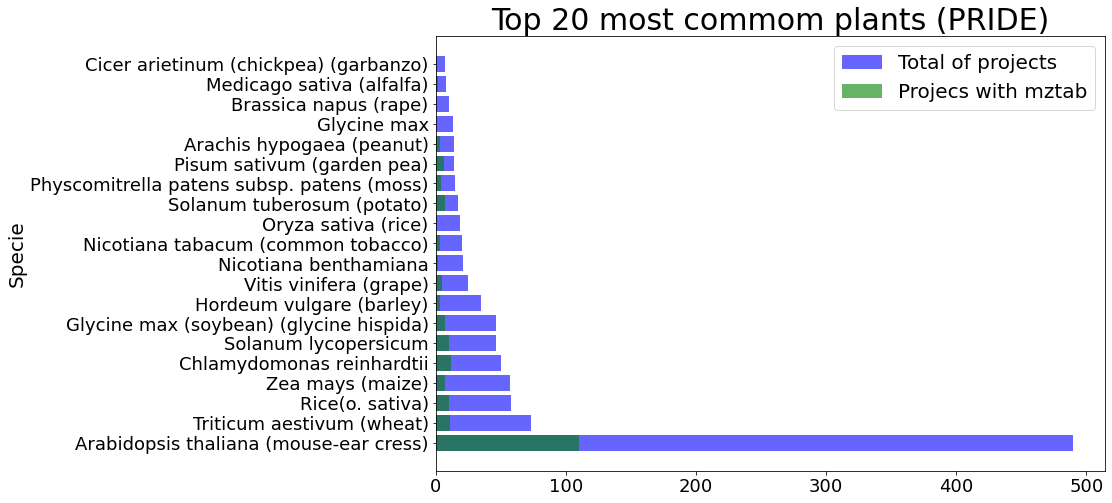

In [69]:
plt.figure(figsize = (12,8))
plot = plt.subplot()
projects = plot.barh(plants_count_dataframe.Specie[:20],plants_count_dataframe.Total_projects[:20],color = 'b',align='center', alpha = .6)
mztabs = plot.barh(plants_count_dataframe.Specie[:20],plants_count_dataframe.Projects_with_mztab[:20],color = 'g',align='center', alpha = 0.6,)
plot.set_ylabel("Specie",fontsize = 20)
plot.set_title("Top 20 most commom plants (PRIDE)", fontsize = 30)
plot.tick_params(labelsize = 18)
plot.legend((projects,mztabs),("Total of projects","Projecs with mztab"),fontsize = 20)
plt.savefig("fig1_most_commom_plants.png",bbox_inches='tight')


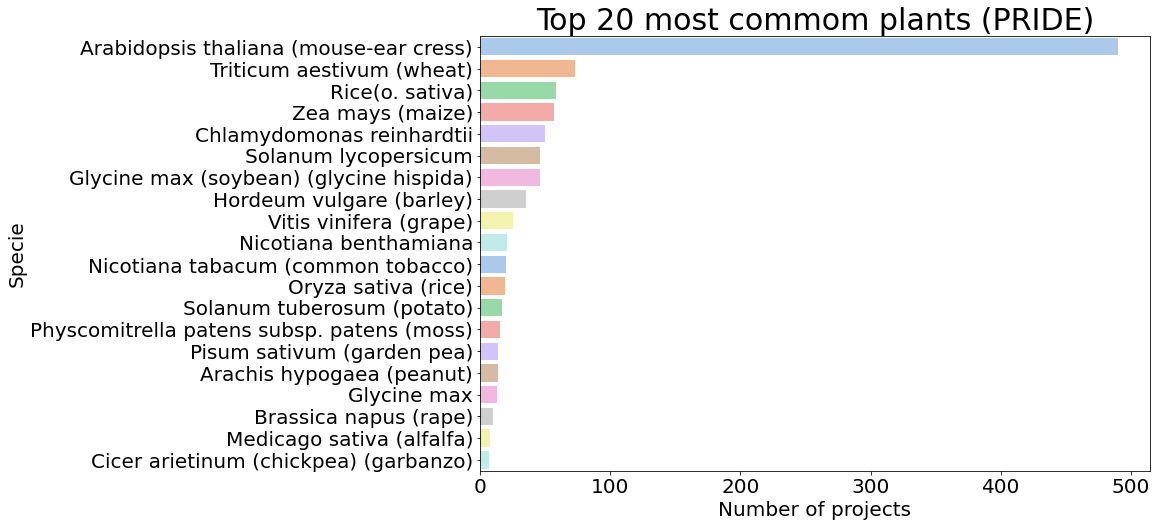

In [20]:
plt.figure(figsize = (12,8))
plants_barblot = sn.barplot(
    x = "Total_projects",
    y = "Specie",
    data = plants_count_dataframe[:20],
    palette = "pastel",)





plants_barblot.set_xlabel("Number of projects", fontsize = 20)
plants_barblot.set_ylabel("Specie",fontsize = 20)
plants_barblot.set_title("Top 20 most commom plants (PRIDE)", fontsize = 30)
plants_barblot.tick_params(labelsize = 20)
plt.savefig("fig1_most_commom_plants.png",bbox_inches='tight')


Despite we want to focus on *Arabidopsis thaliana* I going to use *Coffea arabica* to makes somes tests to spare memory and computational resources

In [101]:
example_projects = [projects for projects,values in pride_plant.items() if "Glycine max (soybean) (glycine hispida)" in values["name"]]
len(example_projects)

46

In [102]:
example_projects = list(set(pride_plants_mztab.keys()) & set(example_projects))
len(example_projects)

7

In [ ]:
pride_ppx_obj = ppx.PrideProject(example_projects,local = "/home/tiagoborelli/Documentos/lncRNA/soybean")
pride_ppx_obj.download(pride_plants_mztab[example_projects])

In [115]:
for projetcs in example_projects:
    pride_ppx_obj = ppx.PrideProject(projetcs,local = "/home/tiagoborelli/Documentos/lncRNA/soybean")
    pride_ppx_obj.download(pride_plants_mztab[projetcs])

TOTAL: 100%|██████████| 137/137 [23:21<00:00, 10.23s/files]


FileNotFoundError: The following files were not found in the remote repository: generated/PRIDE_Exp_Complete_Ac_29517.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29518.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29519.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29520.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29521.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29522.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29523.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29524.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29525.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29526.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29527.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29528.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29529.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29530.pride.mztab.gz, generated/PRIDE_Exp_Complete_Ac_29531.pride.mztab.gz

In [100]:
plants_count_dataframe.head(10)

,Specie,Total_projects,Projects_with_mztab
1,Arabidopsis thaliana (mouse-ear cress),490,110
45,Triticum aestivum (wheat),73,11
18,Rice(o. sativa),58,10
2,Zea mays (maize),57,7
0,Chlamydomonas reinhardtii,50,12
22,Solanum lycopersicum,46,10
35,Glycine max (soybean) (glycine hispida),46,7
25,Hordeum vulgare (barley),35,3
6,Vitis vinifera (grape),25,5
9,Nicotiana benthamiana,21,2


In [113]:
for k1 in example_projects:
    for k2 in pride_plants_mztab.keys():
        if k1 == k2:
            print(k1, len(pride_plants_mztab[k1]))



PXD013198 137
PXD000247 15
PXD003326 12
PXD000160 24
PXD001132 35
PXD000709 30
PXD000201 90


Got o /study/mztab_study.ipynb to analyse mztabfiles